In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

print(tf.__version__)

1.4.1


In [2]:
def plot_gradients(n, k):
    config = tf.ConfigProto(inter_op_parallelism_threads=1, intra_op_parallelism_threads=1)
    with tf.Session(config=config) as sess:
        inputs = tf.zeros((n, 1, k+1), dtype=tf.float32)
        labels_indices = tf.constant([[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]], dtype=tf.int64)
        labels_values  = tf.constant([0, 1, 2, 3, 4], dtype=tf.int32)
        labels = tf.SparseTensor(indices=labels_indices, values=labels_values, dense_shape=(1, k+1))
        sequence_length = np.array([n])

        loss = tf.nn.ctc_loss(labels, inputs, sequence_length)
        g, = tf.gradients(loss, inputs)

        g_v = sess.run(g)
    plt.plot(-g_v[:,0,:])
    plt.show()

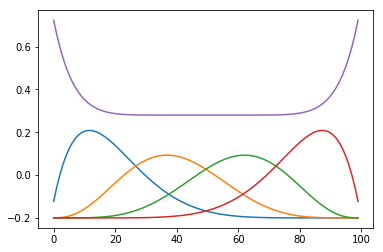

In [3]:
plot_gradients(100, 4)

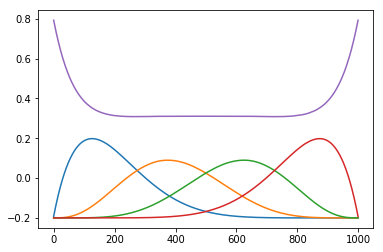

In [4]:
plot_gradients(1000, 4)

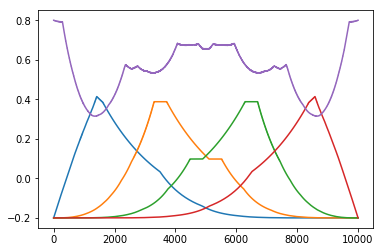

In [5]:
plot_gradients(10000, 4)

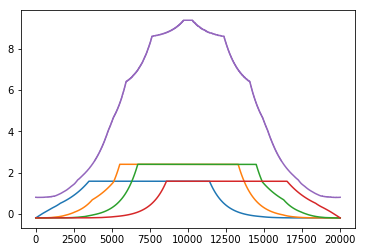

In [6]:
plot_gradients(20000, 4)